In [1]:
%load_ext autoreload
%autoreload 2

import risk_kit as rk
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3

In [2]:
stock_name = input("Enter the stock name ").upper()

Enter the stock name INFY


In [14]:
#url = 'https://ticker.finology.in/company/'+stock_name
#html = urllib.request.urlopen(url).read()


In [15]:
#soup = BeautifulSoup(html,'html.parser')
soup = rk.stock_data(stock_name)

cmp = soup.find("span", class_="Number")

print("Current Market Price - ₹",cmp.text,sep='.')

Current Market Price - ₹.1127.6


# ***Strengths***

In [16]:
strength = soup.find("ul", class_="strength").text
print(strength)


The Company is Virtually Debt Free.
The company has effective cash conversion ratio of 100.186579167471.



# ***Limitations***

In [17]:
limitations = soup.find("ul", class_="limitations").text
print(limitations)


The company has delivered poor profit growth of 3.9991730983969% over past 3 years.



# Annual Report

In [18]:
reports = rk.balance_sheet(stock_name)

In [19]:
annual_report = reports[1].rename(columns={'Unnamed: 0':' '})

In [20]:
if 'TTM' in annual_report.columns:
    annual_report.drop('TTM',axis=1,inplace=True)

In [21]:
years=np.array(annual_report.columns[1:])
years= [int(item.split()[1]) for item in years]
years = np.array(years)

revenue=annual_report.iloc[0][1:]
revenue = [int(item) for item in revenue]
revenue = np.array(revenue)

# Revenue (YOY)

<IPython.core.display.Javascript object>


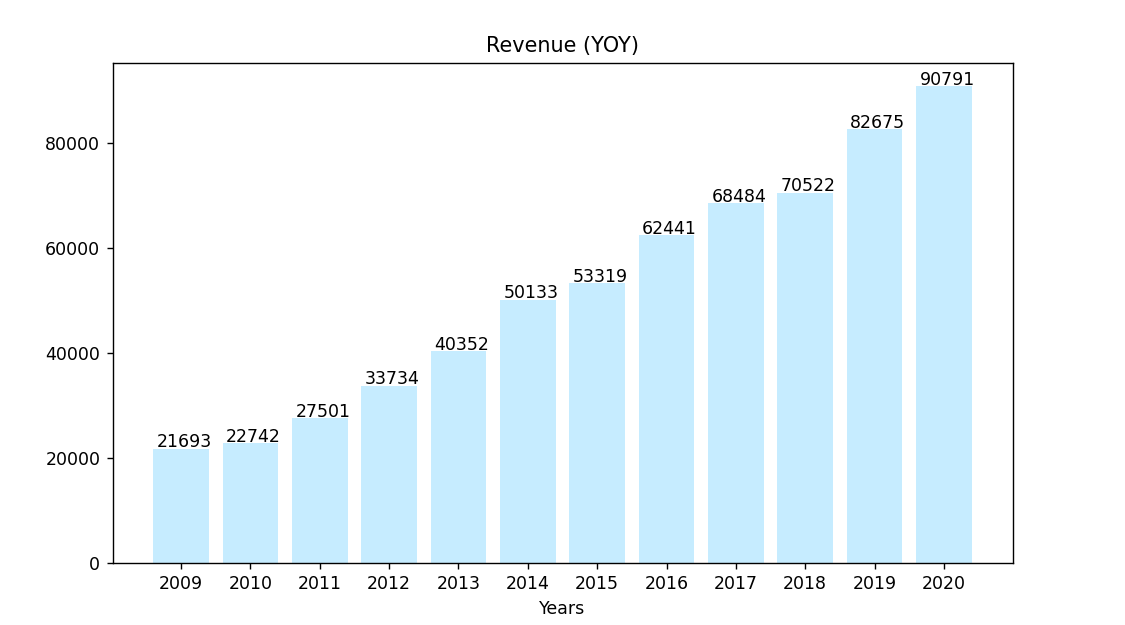

In [22]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(years, years)
ax.bar(years,revenue,color="#C6ECFF")
ax.set_title("Revenue (YOY)")
ax.set_xlabel("Years")

xlocs, xlabs = plt.xticks()
for i, v in enumerate(revenue):
    plt.text(xlocs[i] - 0.35, v + 250, str(v))

In [17]:
#fig.set_figwidth(5) use this one

# Profit (YOY)

<IPython.core.display.Javascript object>


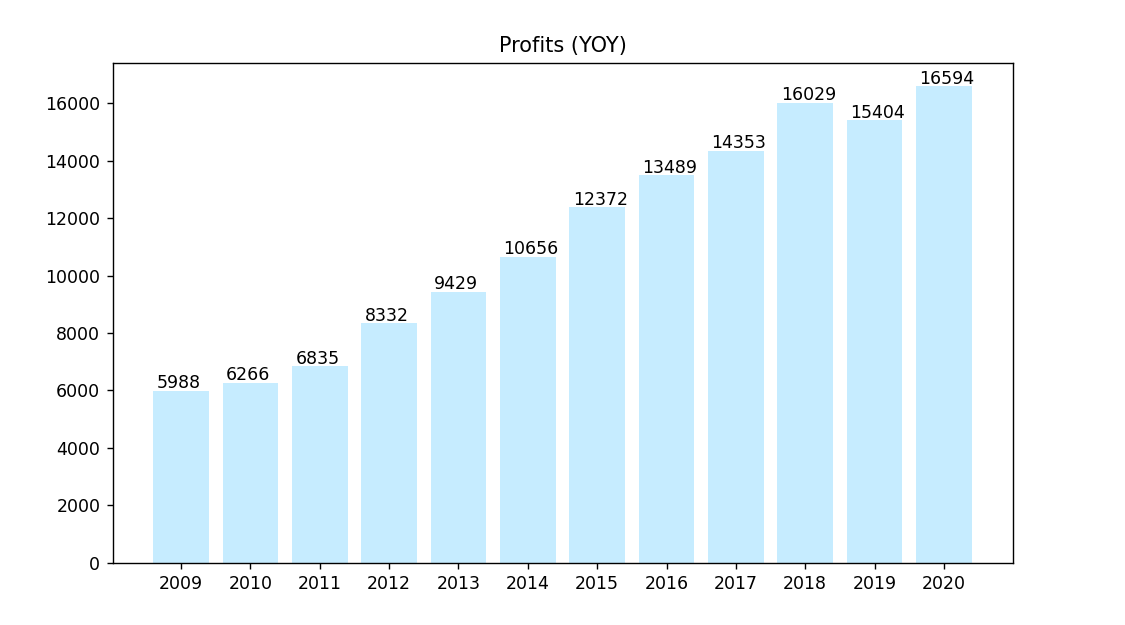

In [23]:
profit=annual_report.iloc[9][1:]
profit = [int(item) for item in profit]
profit = np.array(profit)

fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(years, years)
plt.title("Profits (YOY)")
ax.bar(years,profit,color="#C6ECFF")

xlocs, xlabs = plt.xticks()
for i, v in enumerate(profit):
    plt.text(xlocs[i] - 0.35, v + 95, str(v))

<IPython.core.display.Javascript object>


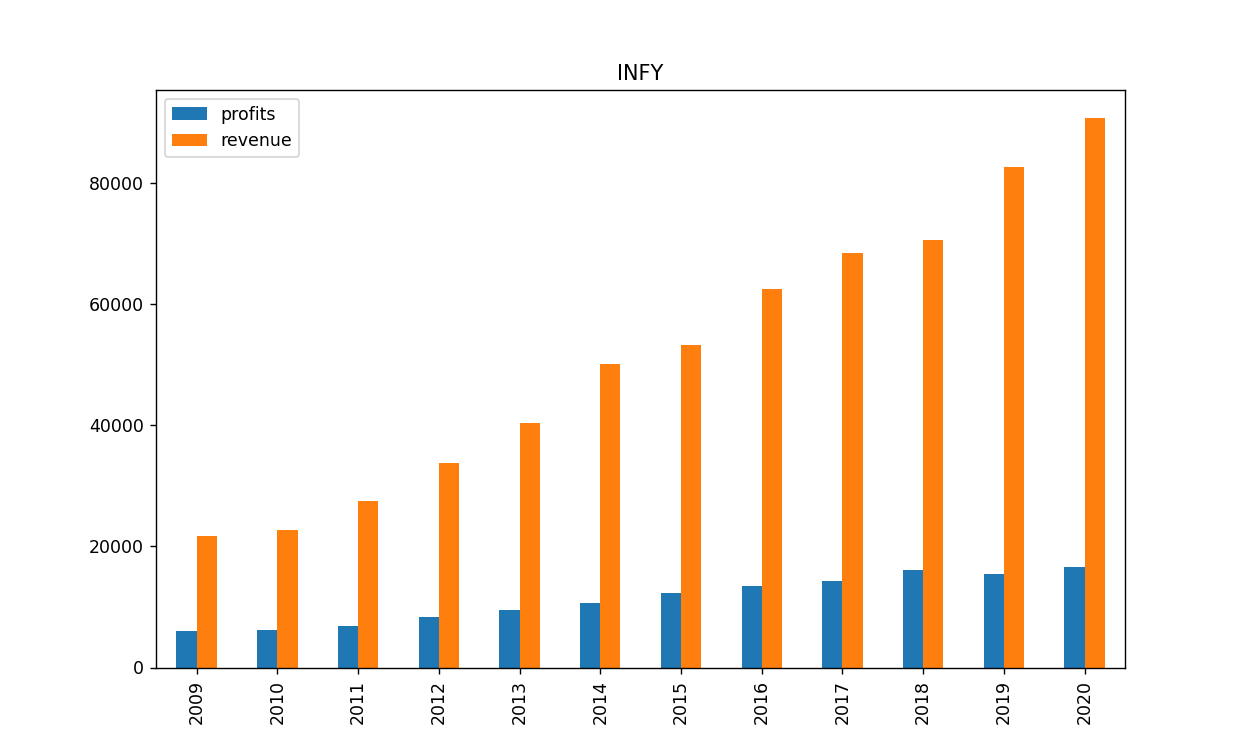

In [24]:
rvpr=pd.DataFrame(zip(profit,revenue),columns=['profits','revenue'],index=years)
a=rvpr.plot.bar(figsize=(10,6),title=stock_name);

In [25]:
a.set_xticklabels([])
fig1=a.figure

# EPS

<IPython.core.display.Javascript object>


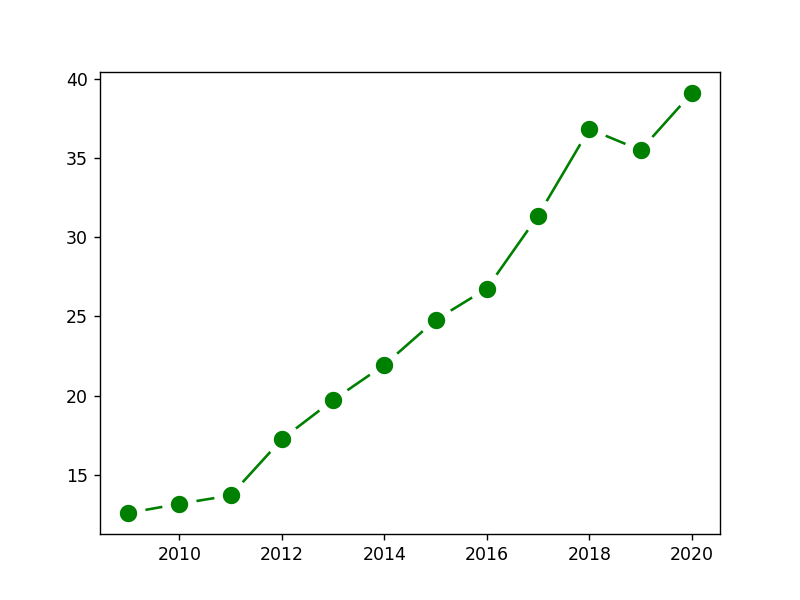

In [26]:
eps=annual_report.iloc[10][1:]
eps = [float(item) for item in eps]
plt.plot(years, eps, 'go-', mec='w', mew=5, ms=15);

In [ ]:
#next part

In [27]:
from datetime import date
import yfinance as yf

In [28]:
stock = yf.Ticker(stock_name+".NS")

In [29]:
#to remove margins in graphs in whole program
#plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
#plt.rcParams['axes.xmargin'] = 0
#plt.rcParams['axes.ymargin'] = 0 #try with this plt.margins(0) for single plot
stocks=[]

In [30]:
stocks.append(stock.history(period="20y"))

<IPython.core.display.Javascript object>


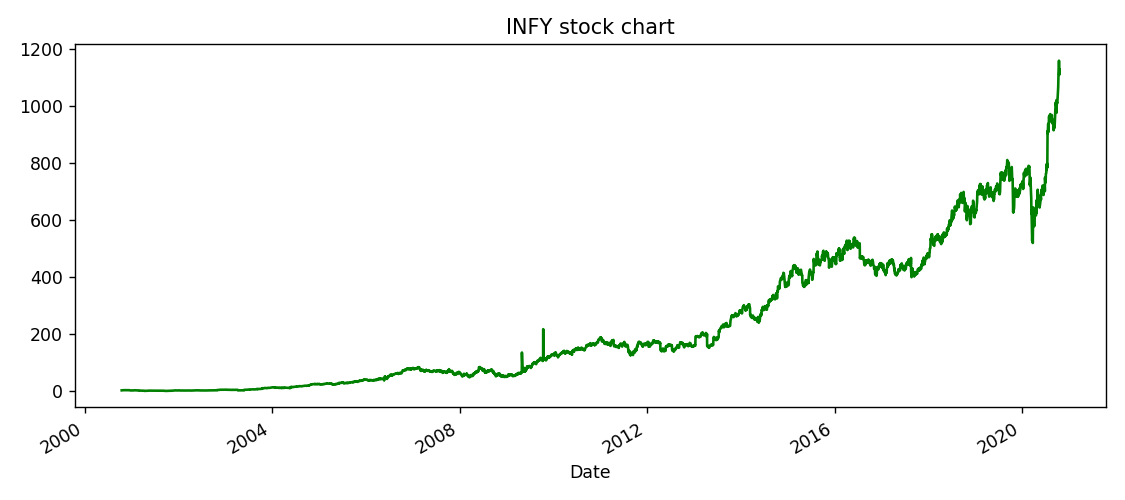

In [31]:
#Red or Green chart
first=stocks[0].loc[stocks[0].head(1).index[0],'Close']
last=stocks[0].loc[stocks[0].tail(1).index[0],'Close']
if first<last:
    clr='green'
else:
    clr='red'
#Plotting the stock chart
fig_obj=stocks[0]['Close'].plot(figsize=(9,4),color=clr,title=stock_name+" stock chart")
fig2=fig_obj.figure
plt.tight_layout()

In [ ]:
#stocks[0]['Open'].plot()

In [32]:
stock1_name,stock2_name=input("Enter two more stock names you want to compare with ").split()
stock1 = yf.Ticker(stock1_name+".NS")
stock2 = yf.Ticker(stock2_name+".NS")

stocks.append(stock1.history(period="20y"))
stocks.append(stock2.history(period="20y"))

Enter two more stock names you want to compare with TCS HCLTECH


In [33]:
#delete below two columns use the function
#stocks = rk.drop_divnstksplit(stocks)

In [34]:
cols=['Dividends', 'Stock Splits'] 

In [35]:
for i in range(3):
    try:
        stocks[i].drop(cols,axis=1,inplace=True)
    except:
        continue

<IPython.core.display.Javascript object>


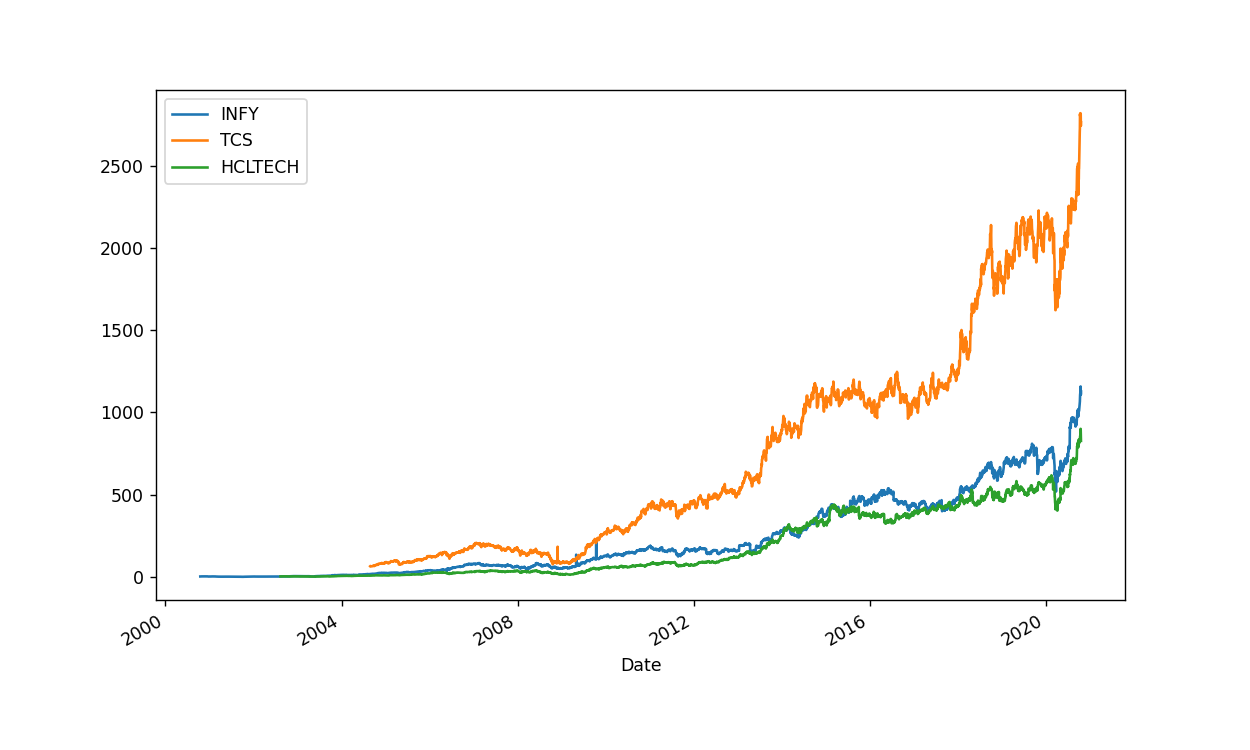

In [36]:
labl=[stock_name,stock1_name,stock2_name]
for i in range(3):
    stocks[i]['Close'].plot(figsize=(10,6))
plt.legend(labl);
fig3 = plt.gcf()

# Plotting volumes

<IPython.core.display.Javascript object>


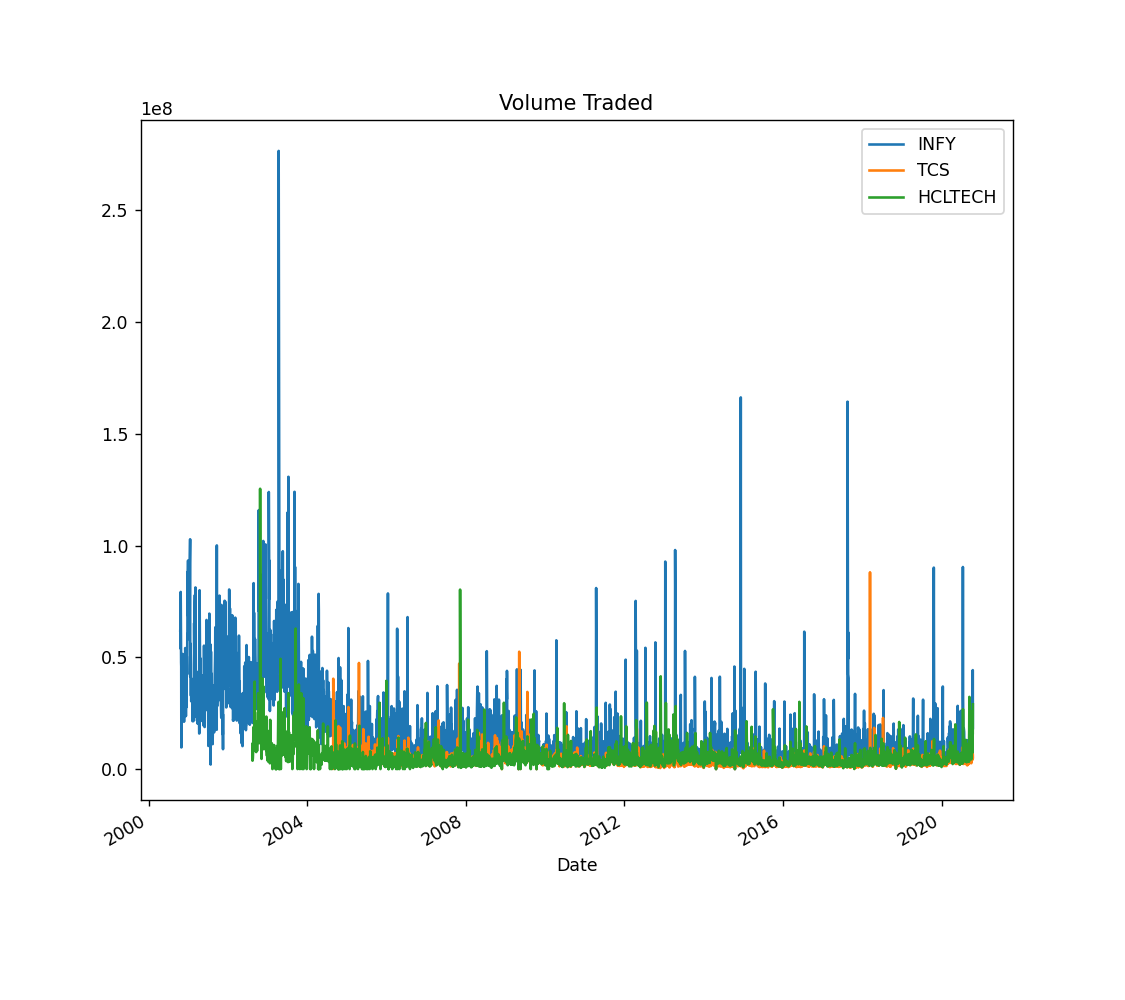

In [37]:
stocks[0]['Volume'].plot(label=stock_name,figsize=(9,8),title='Volume Traded')
stocks[1]['Volume'].plot(label=stock1_name)
stocks[2]['Volume'].plot(label=stock2_name)
plt.legend();

## Moving average 50 & 200 days

<IPython.core.display.Javascript object>


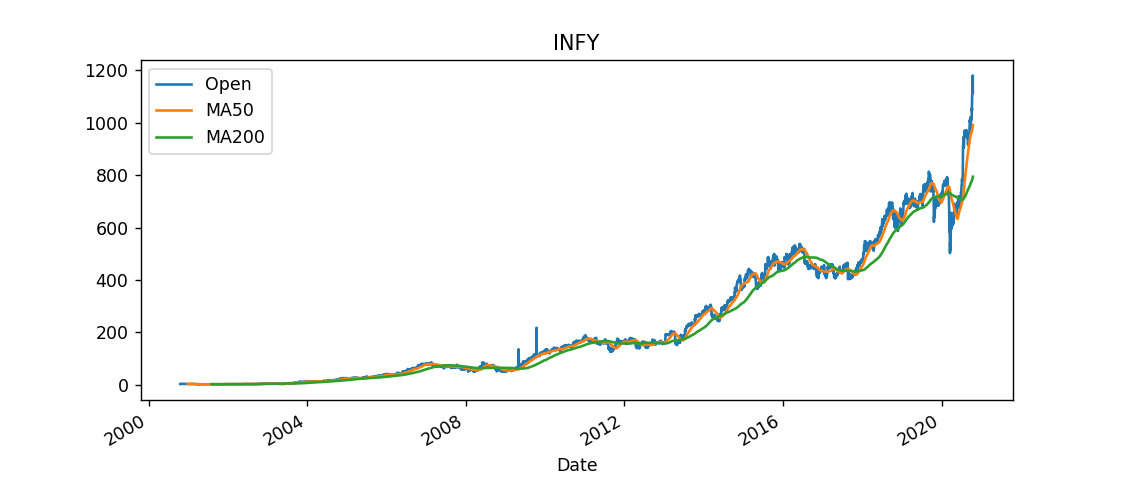

In [38]:
stocks[0]['MA50'] = stocks[0]['Open'].rolling(50).mean()
stocks[0]['MA200'] = stocks[0]['Open'].rolling(200).mean()
stocks[0][['Open','MA50','MA200']].plot(title=stock_name,figsize=(9,4));

# SHAREHOLDING PATTERN

In [39]:
shareholders = list(reports[9]['Unnamed: 0'])
shareholders = [i.rstrip("\xa0+") for i in shareholders]
shareholding = list(reports[9][reports[9].columns[-1]])

<IPython.core.display.Javascript object>


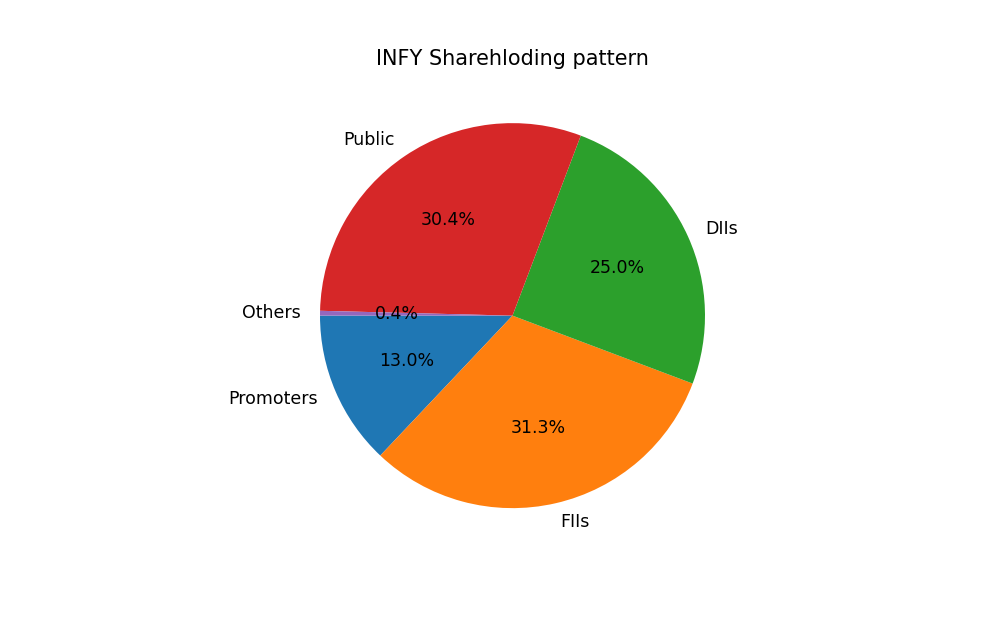

In [40]:
fig4 = plt.figure(figsize =(8, 5)) 
plt.pie(shareholding, labels = shareholders, autopct='%1.1f%%',startangle=180) 
plt.title(stock_name+" Sharehloding pattern")
plt.show()

In [41]:
for i in range(3):
    stocks[i].dropna(inplace=True)

In [42]:
prototype = stocks.copy()

In [43]:
#to get promoterHolding to input in mongodb and display in report
try:
    indx=shareholders.index('Promoters')
    promoterHolding=shareholding[indx]
except:
    promoterHolding=0.0

## Daily percentage change

In [44]:
for i in range(3):
    stocks[i]['returns'] = stocks[i]['Close'].pct_change(1)

<IPython.core.display.Javascript object>


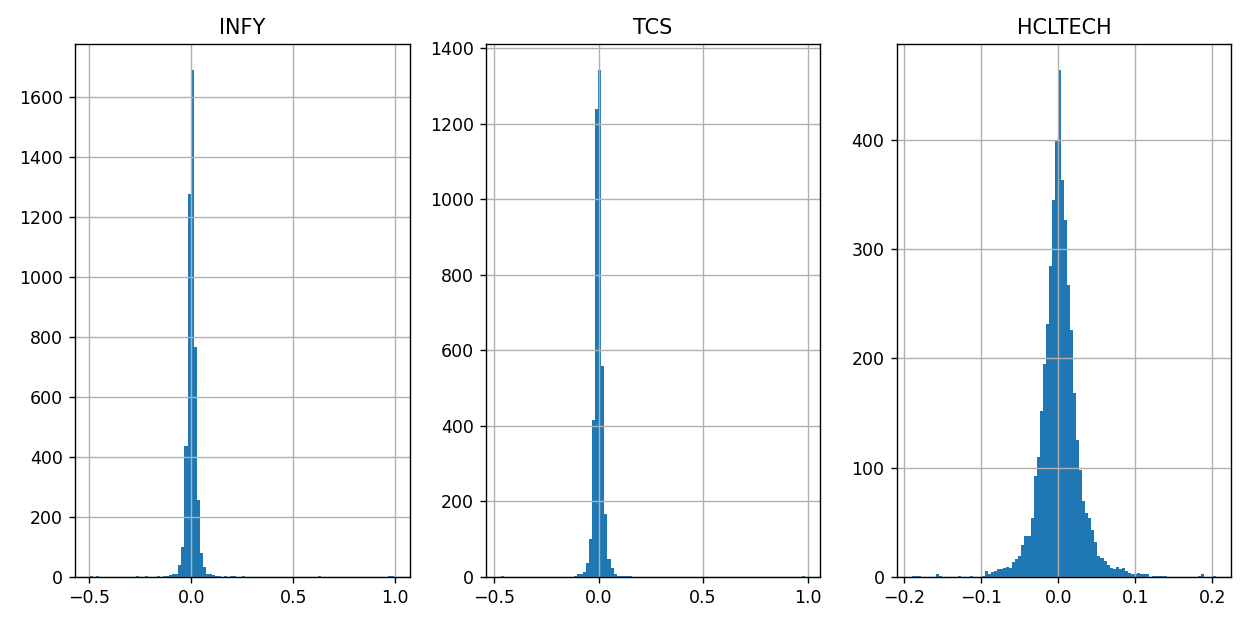

In [45]:
names=[stock_name,stock1_name,stock2_name]
for i in range(3):
    plt.subplot(1,3,i+1)
    stocks[i]['returns'].hist(bins=100,figsize=(10,5));
    plt.title(names[i])
plt.tight_layout()
fig5 = plt.gcf()

In [ ]:
#repeated
names=[stock_name,stock1_name,stock2_name]
for i in range(3):
    plt.subplot(1,3,i+1)
    stocks[i].fillna(value=0,axis=1,inplace=True)
    stocks[i]['returns'].hist(bins=100,figsize=(10,5));
    plt.title(names[i])
plt.tight_layout()
fig5 = plt.gcf()

<IPython.core.display.Javascript object>


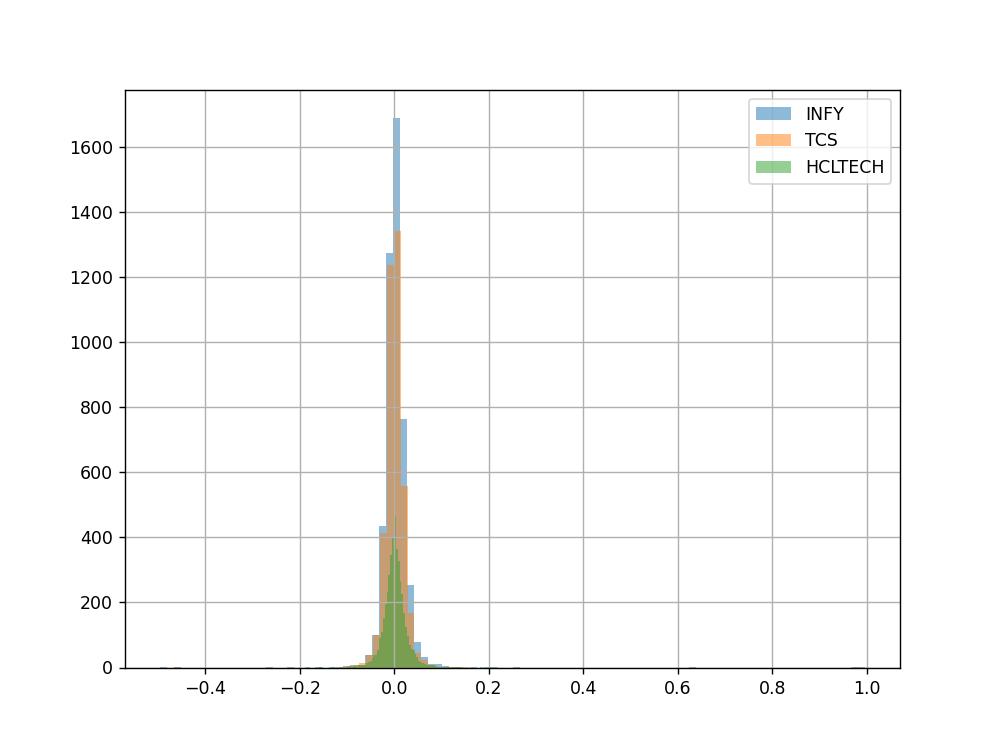

In [40]:
stocks[0]['returns'].hist(bins=100,label=stock_name,figsize=(8,6),alpha=0.5)
stocks[1]['returns'].hist(bins=100,label=stock1_name,alpha=0.5)
stocks[2]['returns'].hist(bins=100,label=stock2_name,alpha=0.5)
plt.legend();

<IPython.core.display.Javascript object>


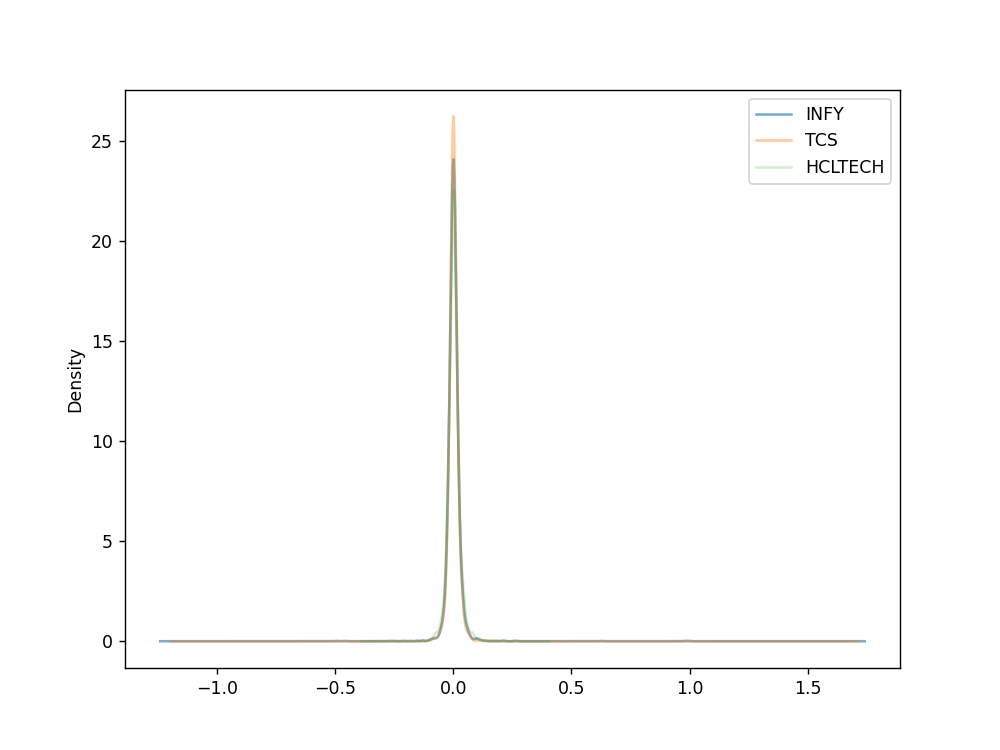

In [41]:
#KDE kernel density estimation instead of histogram
stocks[0]['returns'].plot(kind='kde',label=stock_name,figsize=(8,6),alpha=0.6)
stocks[1]['returns'].plot(kind='kde',label=stock1_name,alpha=0.4)
stocks[2]['returns'].plot(kind='kde',label=stock2_name,alpha=0.2)
plt.legend();

<IPython.core.display.Javascript object>


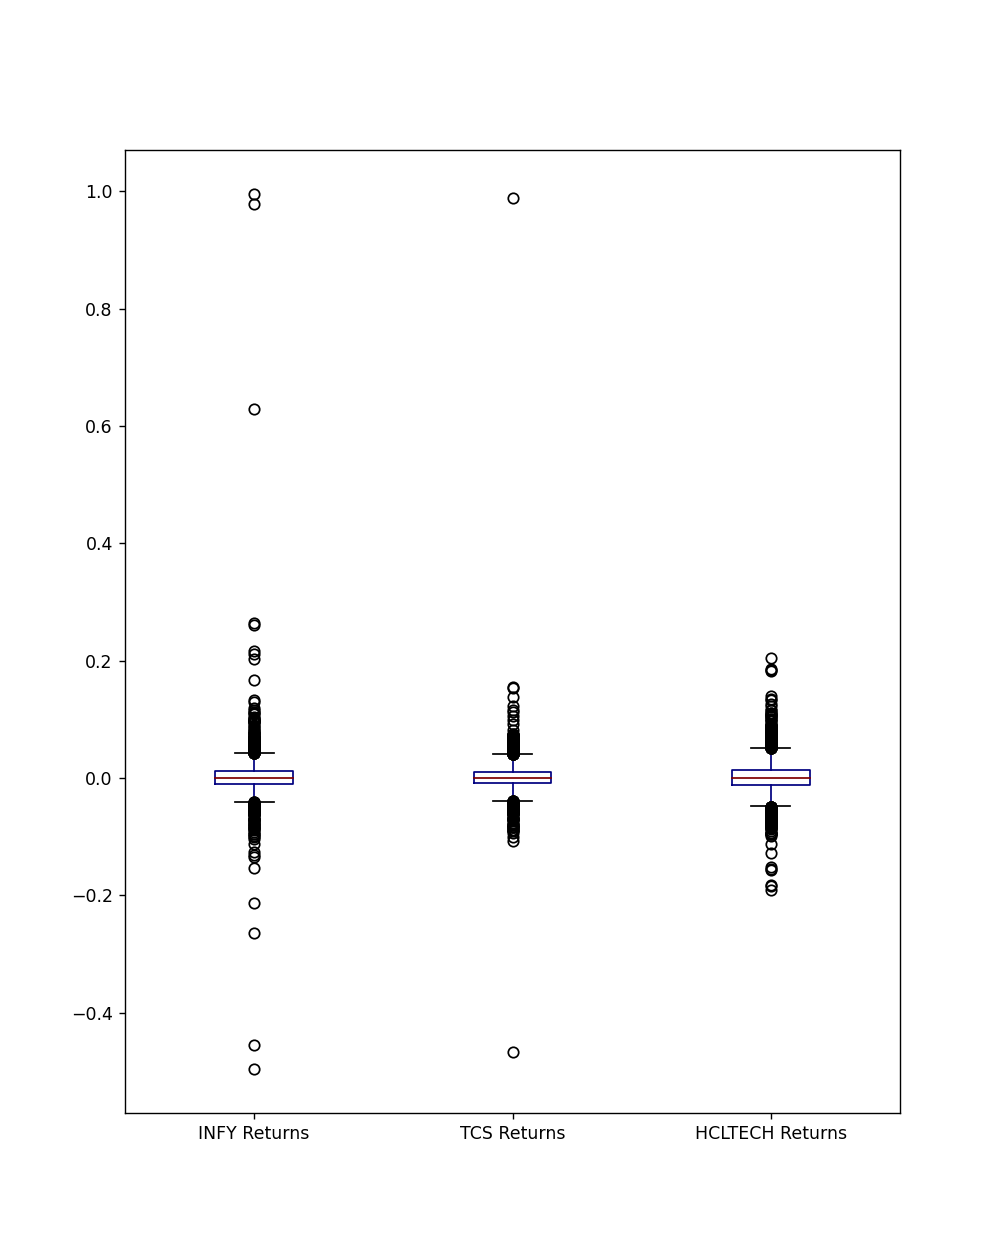

In [42]:
#boxplot to compare returns
box_df = pd.concat([stocks[0]['returns'],stocks[1]['returns'],stocks[2]['returns']],axis=1)
box_df.columns = [stock_name+" Returns",stock1_name+" Returns",stock2_name+" Returns"]
box_df.plot(kind='box',figsize=(8,10),colormap='jet');

## Scatter matrix plot (finding correlation)

In [ ]:
box_df

<IPython.core.display.Javascript object>


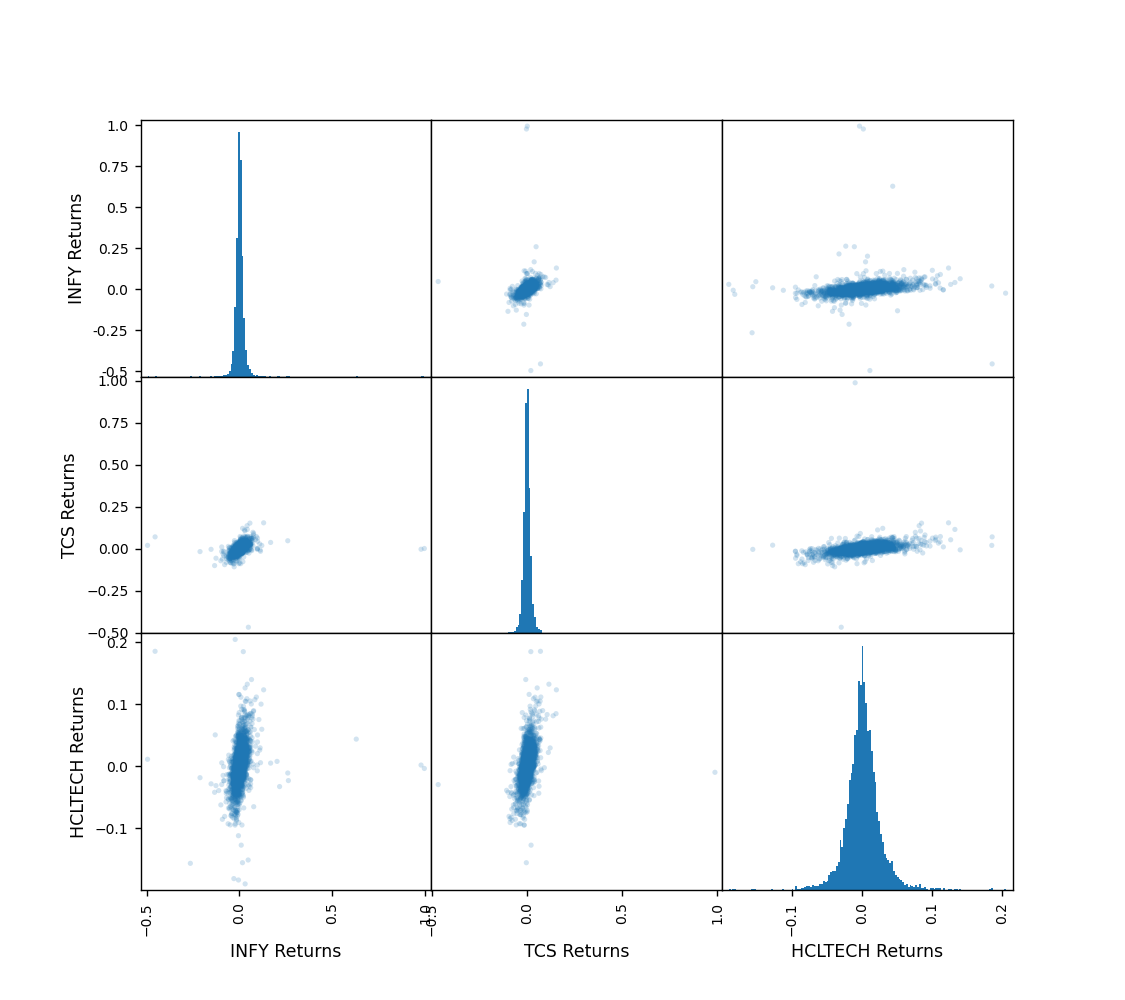

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(box_df,figsize=(9,8),alpha=0.2,hist_kwds={'bins':150});

# PRICE FORECASTING

In [46]:
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

In [47]:
from datetime import date
import datetime

i=0
while True:
    try:
        d=date.today() - datetime.timedelta(days=1825-i)
        d=stocks[0].loc[d:]
        break
    except:
        i = i+1   

In [48]:
data = stocks[0]

In [49]:
#arima
df = d['Close']


In [50]:
df = df.to_frame()

<IPython.core.display.Javascript object>


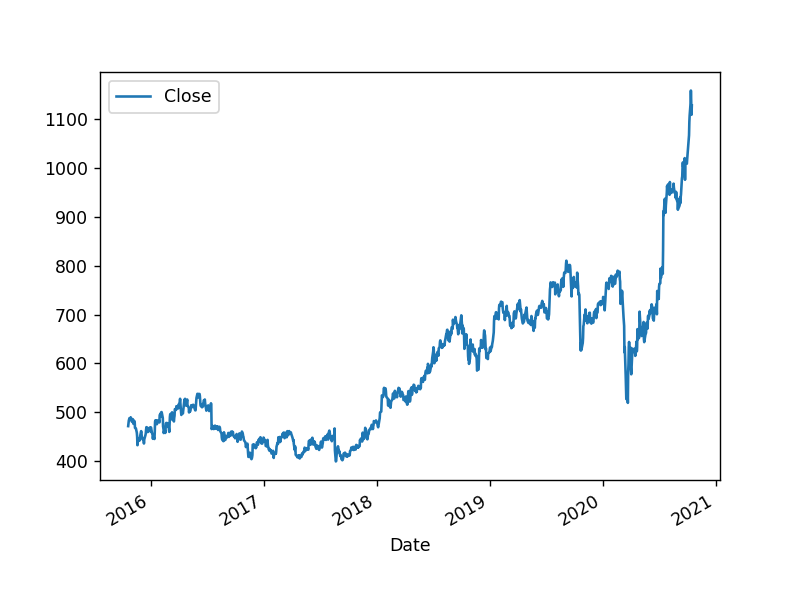

In [51]:
df.plot(style="-");

In [52]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [53]:
warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(df, order=param,enforce_stationarity=True, enforce_invertibility=True)     
        results = mod.fit()
        # save results in lists
        aic.append(results.aic)
        parameters.append(param)
        #seasonal_param.append(param_seasonal)
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)            
print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))

ARIMA(0, 0, 0) - AIC:19259.381852594655
ARIMA(0, 0, 1) - AIC:17584.501383689247
ARIMA(0, 0, 2) - AIC:16140.826685757307
ARIMA(0, 1, 0) - AIC:9436.333360934033
ARIMA(0, 1, 1) - AIC:9434.502891760945
ARIMA(0, 1, 2) - AIC:9435.02702786784
ARIMA(0, 2, 0) - AIC:10347.86207658548
ARIMA(0, 2, 1) - AIC:9435.175941356578
ARIMA(0, 2, 2) - AIC:9432.696798214856
ARIMA(1, 0, 0) - AIC:9454.61545084832
ARIMA(1, 0, 1) - AIC:9452.792084677787
ARIMA(1, 0, 2) - AIC:9453.310498510353
ARIMA(1, 1, 0) - AIC:9434.270395022337
ARIMA(1, 1, 1) - AIC:9435.93397754573
ARIMA(1, 1, 2) - AIC:9436.302807104688
ARIMA(1, 2, 0) - AIC:9925.123818777107
ARIMA(1, 2, 1) - AIC:9432.46762115567
ARIMA(1, 2, 2) - AIC:9433.748134424948
ARIMA(2, 0, 0) - AIC:9452.697199637803
ARIMA(2, 0, 1) - AIC:9453.148028307622
ARIMA(2, 0, 2) - AIC:9448.382517047394
ARIMA(2, 1, 0) - AIC:9435.390095738923
ARIMA(2, 1, 1) - AIC:9436.598695985282
ARIMA(2, 1, 2) - AIC:9436.400085772084
ARIMA(2, 2, 0) - AIC:9755.277347924995
ARIMA(2, 2, 1) - AIC:9433.

In [54]:
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1228
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -4706.994
Method:                       css-mle   S.D. of innovations             11.147
Date:                Sat, 17 Oct 2020   AIC                           9425.989
Time:                        13:49:24   BIC                           9456.668
Sample:                             2   HQIC                          9437.532
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.001      2.020      0.043    4.97e-05       0.003
ar.L1.D2.Close    -0.9606      0.056    -17.293      0.000      -1.069      -0.852
ar.L2.D2.Close    -0.0947      0.029

<IPython.core.display.Javascript object>


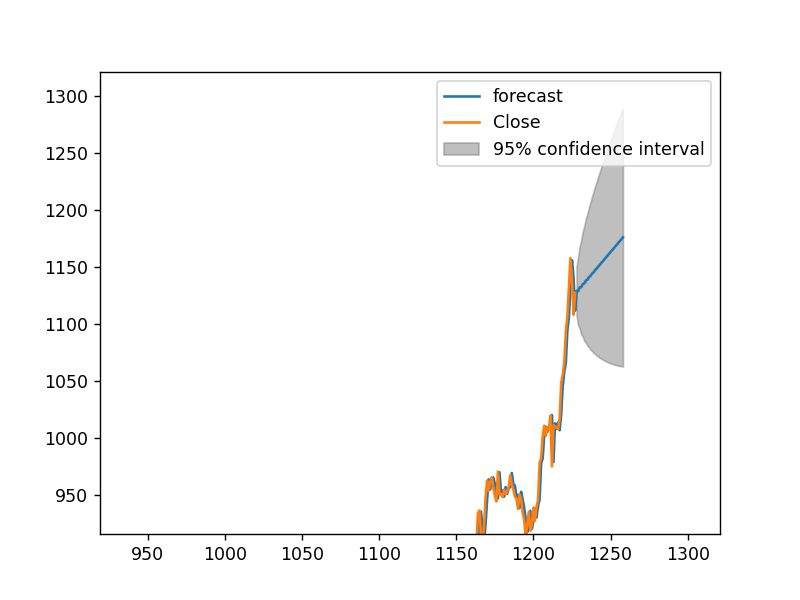

In [105]:
#fig = plt.figure(figsize=(9,10))
#axes = fig.add_axes([0,0,1,1])
fig6=model_fit.plot_predict(start=2, end=len(df)+30)

## Run the below cells to save and generate report

In [56]:
import pymongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

dblist=myclient.list_database_names()
if "test" in dblist:
    mydb = myclient["test"]
    coll = mydb['reports']
    print("Connected to database")
else:
    print("Error connecting to database")

Connected to database


In [57]:
username = input("Enter Username ")

Enter Username sagar


In [58]:
reportname = input("Enter Report name ")

Enter Report name final_infy_report


In [59]:
info = stock.info

In [60]:
info

{'52WeekChange': 0.4079635,
 'SandP52WeekChange': 0.1586746,
 'address1': '44, Infosys Avenue',
 'address2': 'Electronics City Hosur Road',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 0,
 'averageDailyVolume10Day': 12927563,
 'averageVolume': 12117796,
 'averageVolume10days': 12927563,
 'beta': 0.534179,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 0,
 'bookValue': 2.268,
 'category': None,
 'circulatingSupply': None,
 'city': 'Bengaluru',
 'companyOfficers': [],
 'country': 'India',
 'currency': 'INR',
 'dateShortInterest': None,
 'dayHigh': 1135.95,
 'dayLow': 1096.9,
 'dividendRate': 24,
 'dividendYield': 0.0217,
 'earningsQuarterlyGrowth': 0.148,
 'enterpriseToEbitda': 1435.215,
 'enterpriseToRevenue': 365.019,
 'enterpriseValue': 4698895548416,
 'exDividendDate': 1603411200,
 'exchange': 'NSI',
 'exchangeTimezoneName': 'Asia/Kolkata',
 'exchangeTimezoneShortName': 'IST',
 'expireDate': None,
 'fax': '91 80 2852 0362'

In [61]:
info["beta"]

0.534179

In [62]:
html1 = mpld3.fig_to_html(fig1)
json2 = mpld3.fig_to_dict(fig2)
json3 = mpld3.fig_to_dict(fig3)
json4 = mpld3.fig_to_dict(fig4)
json5 = mpld3.fig_to_dict(fig5)
html6 = mpld3.fig_to_html(fig6)

In [63]:
try:
    coll.insert_one({"_id":reportname,"username":username,"data":{"longName":info["longName"],"industry":info["industry"],
    "marketCap":info["marketCap"],"currentPrice":cmp.text,"fiftyTwoWeekHigh":info["fiftyTwoWeekHigh"],"fiftyTwoWeekLow":info["fiftyTwoWeekLow"],
    "bookValue":info["bookValue"],"promoterHolding":promoterHolding,"trailingEps":info["trailingEps"],"trailingPE":info["trailingPE"],
    "website":info["website"],"trailingAnnualDividendYield":info["trailingAnnualDividendYield"],"logo_url":info["logo_url"],"longBusinessSummary":info["longBusinessSummary"],"strength":strength,"limitations":limitations,
    "beta":info["beta"],"twoHundredDayAverage":info["twoHundredDayAverage"],"priceToBook":info["priceToBook"],"earningsQuarterlyGrowth":info["earningsQuarterlyGrowth"],"forwardPE":info["forwardPE"],"forwardEps":info["forwardEps"],"sector":info["sector"],"fiftyDayAverage":info["fiftyDayAverage"]},
    "hfig1":html1,"fig2":json2,"fig3":json3,"fig4":json4,"fig5":json5,"hfig6":html6})
    print("Saved to DB")
except :
    print("Error")

Saved to DB


In [ ]:
#repeated
coll.insert_one({"_id":"two","username":username,"data":{"longName":info["longName"],"industry":info["industry"],
"marketCap":info["marketCap"],"currentPrice":1000,"fiftyTwoWeekHigh":info["fiftyTwoWeekHigh"],"fiftyTwoWeekLow":info["fiftyTwoWeekLow"],
"bookValue":info["bookValue"],"trailingEps":info["trailingEps"],"trailingPE":info["trailingPE"],
"website":info["website"],"trailingAnnualDividendYield":info["trailingAnnualDividendYield"],"logo_url":info["logo_url"],"longBusinessSummary":info["longBusinessSummary"]},
"hfig1":html1,
"fig2":json2,
"fig3":json3,
"fig4":json4,
"fig5":json5,
"hfig6":html6
})
print("Saved to DB")

In [64]:
myclient.close()

## GOTO http://localhost:3000/

# Portfolio Analysis & Optimization

In [65]:
import pymongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

dblist=myclient.list_database_names()
if "test" in dblist:
    mydb = myclient["test"]
    coll = mydb['portfolios']
    
    print("Connected to database")
else:
    print("Error connecting to database")

Connected to database


In [66]:
name=input("Enter the name of the portfolio ")

Enter the name of the portfolio it_portfolio


In [67]:
choices=[]
while True:
    choice=input("Add the ticker symbol of the stock to add to your portfolio - ").upper()
    choices.append(choice)
    yn=input("Do you want to add more (y/n) ? ")
    if yn == 'n' or yn == 'N':
        break
amount=int(input("Enter the total investment amount - "))

Add the ticker symbol of the stock to add to your portfolio - INFY
Do you want to add more (y/n) ? y
Add the ticker symbol of the stock to add to your portfolio - TCS
Do you want to add more (y/n) ? y
Add the ticker symbol of the stock to add to your portfolio - HCLTECH
Do you want to add more (y/n) ? n
Enter the total investment amount - 100000


In [68]:
try:
    coll.insert_one({"_id":name,"stocks":choices,"investment_amount":amount})
    print("Portfolio created successfully")
except:
    print("Portfolio already exists")

Portfolio created successfully


In [69]:
for i in coll.find({"_id":name}):
    p_stocks = i.get("stocks")
    amount = i.get("investment_amount")

In [70]:
no_of_stocks = len(p_stocks)

In [71]:
portfolio=[] #contain ticker object
for i in range(no_of_stocks):
    portfolio.append(yf.Ticker(p_stocks[i]+".NS"))

In [72]:
for i in range(no_of_stocks):
    portfolio[i]=portfolio[i].history(period="5y") #contains ticker dataframe

In [73]:
#Computing Normed Returns 
for stock_df in portfolio:
    stock_df['Normed Return'] = stock_df['Close']/stock_df.iloc[0]['Close']

In [74]:
#Dropping unwanted columns
portfolio = rk.drop_divnstksplit(portfolio)

In [75]:
allocations=[]
for i in range(no_of_stocks):
    print("Enter the portfolio allocation for - ",p_stocks[i])
    allocations.append(float(input()))
if sum(allocations) != 1.0:
    allocations = []
    print("(Error) Please Re - Enter, The sum of all allocations must equal to 1")

Enter the portfolio allocation for -  INFY
0.3
Enter the portfolio allocation for -  TCS
0.4
Enter the portfolio allocation for -  HCLTECH
0.3


In [76]:
for stock_df,allo in zip(portfolio,allocations):
    stock_df["Allocation"] = stock_df['Normed Return'] * allo

In [77]:
portfolio[0].tail()

,Open,High,Low,Close,Volume,Normed Return,Allocation
Date,,,,,,,
2020-10-12,1123.00,1140.00,1112.10,1132.10,14633537,2.436458,0.730937
2020-10-13,1135.55,1166.05,1135.55,1157.80,17523825,2.491768,0.747530
2020-10-14,1162.00,1164.90,1131.10,1137.00,16649573,2.447003,0.734101
2020-10-15,1180.00,1186.00,1092.50,1108.25,44288251,2.385129,0.715539
2020-10-16,1113.85,1135.95,1096.90,1127.50,18365685,2.426558,0.727967


In [78]:
print("Your investment amount is ",amount)

Your investment amount is  100000


In [16]:
#amount=100000

In [79]:
for stock_df in portfolio:
    stock_df["Position Values"] = stock_df["Allocation"] * amount

In [80]:
portfolio_val=pd.DataFrame()
#Find a way to concat by getting only the required columns
portfolio_val = pd.concat(portfolio,axis=1)

In [81]:
portfolio_val = portfolio_val['Position Values']
portfolio_val.columns = p_stocks
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

<IPython.core.display.Javascript object>


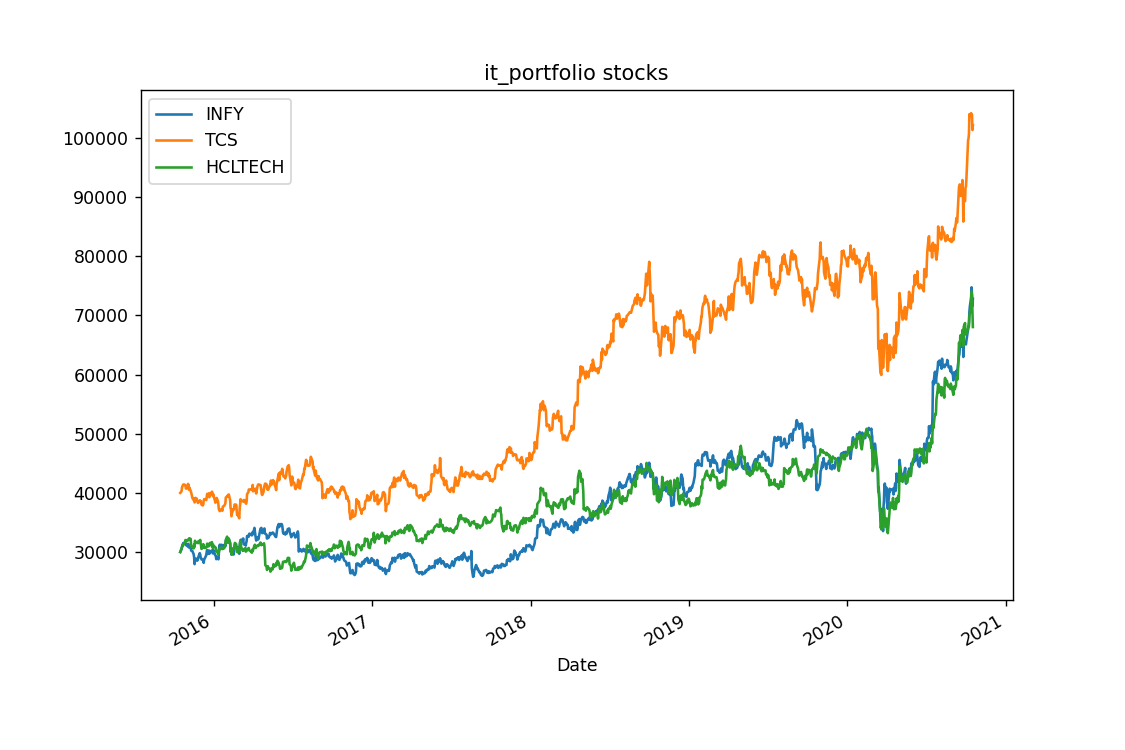

In [82]:
fig_obj=portfolio_val[p_stocks].plot(figsize=(9,6),title=name+" stocks");
pfig1 = fig_obj.figure

<IPython.core.display.Javascript object>


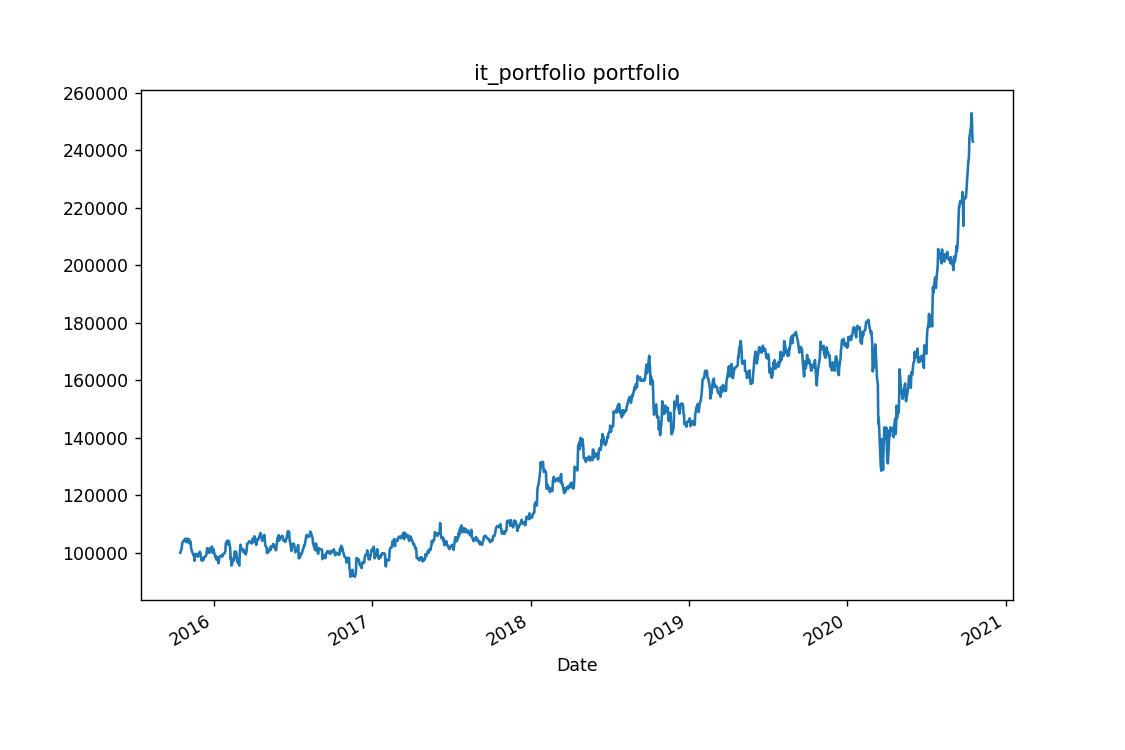

In [104]:
fig_obj = portfolio_val['Total Pos'].plot(figsize=(9,6),title=name+" portfolio");
pfig2 = fig_obj.figure

In [84]:
#Daily returns
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
#Cumulative returns i.e total return from the day i invested till now
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return was {}  percent!'.format(cum_ret))

Our return was 143.0079838596117  percent!


<IPython.core.display.Javascript object>


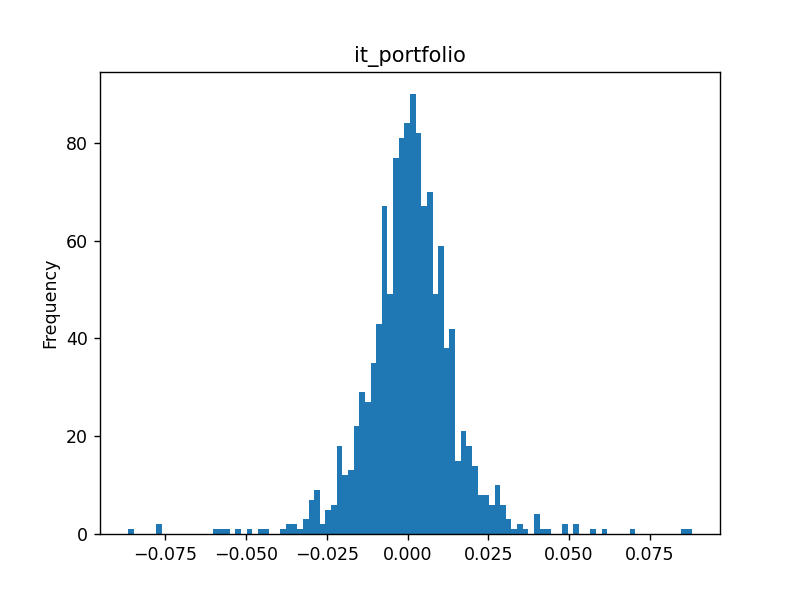

In [85]:
fig_obj = portfolio_val['Daily Return'].plot(kind='hist',bins=100,title=name);
pfig3 = fig_obj.figure

In [86]:
stks=pd.DataFrame()
#Find a way to concat by getting only the required columns
stks = pd.concat(portfolio,axis=1)
stks = stks['Close']
stks.columns = p_stocks

In [87]:
#stks.fillna(0,inplace=True)

In [88]:
stock_daily_ret = stks.pct_change(1)
#stock_daily_ret.fillna(0,inplace=True)
stock_daily_ret.head()

,INFY,TCS,HCLTECH
Date,,,
2015-10-16,NaN,NaN,NaN
2015-10-19,0.015582,0.006785,0.019714
2015-10-20,0.012588,0.015269,0.007636
2015-10-21,0.011050,0.005652,0.010247
2015-10-23,0.010101,0.007203,-0.000106


In [89]:
#log returns
log_ret = np.log(stks/stks.shift(1))
#log_ret.fillna(0,inplace=True)
log_ret.head()

,INFY,TCS,HCLTECH
Date,,,
2015-10-16,NaN,NaN,NaN
2015-10-19,0.015461,0.006762,0.019522
2015-10-20,0.012509,0.015153,0.007607
2015-10-21,0.010989,0.005636,0.010195
2015-10-23,0.010051,0.007177,-0.000106


<IPython.core.display.Javascript object>


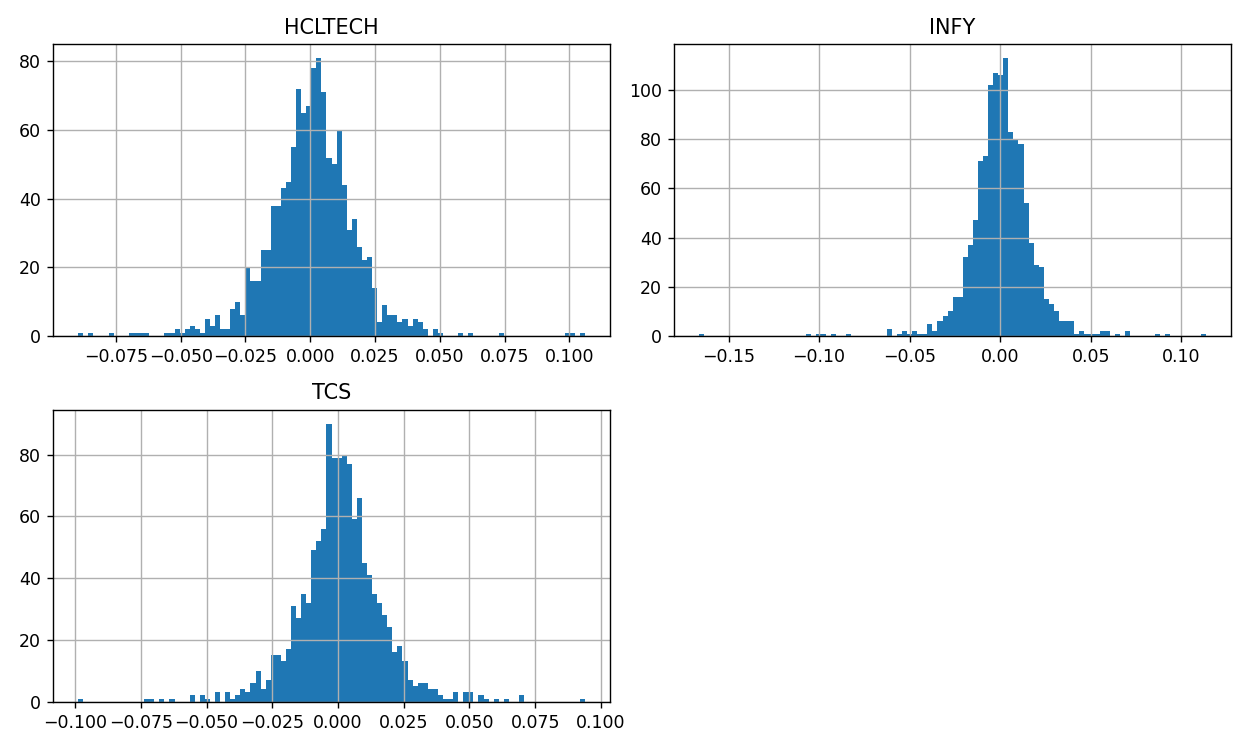

In [90]:
pfig4=[]
fig_obj = log_ret.hist(bins=100,figsize=(10,6));
plt.tight_layout()
#for i in range(len(fig_obj)):
#    for j in range(len(fig_obj[i])):
#        pfig4.append(fig_obj[i][j].figure)
pfig4 = plt.gcf()

In [91]:
num_ports = 25000

all_weights = np.zeros((num_ports,len(p_stocks)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(no_of_stocks))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [92]:
sharpe_arr.max()

0.8122732422796562

In [93]:
n = sharpe_arr.argmax()

In [94]:
all_weights[n,:]

array([0.25642669, 0.53011986, 0.21345346])

In [95]:
max_sr_ret = ret_arr[n]
max_sr_vol = vol_arr[n]

<IPython.core.display.Javascript object>


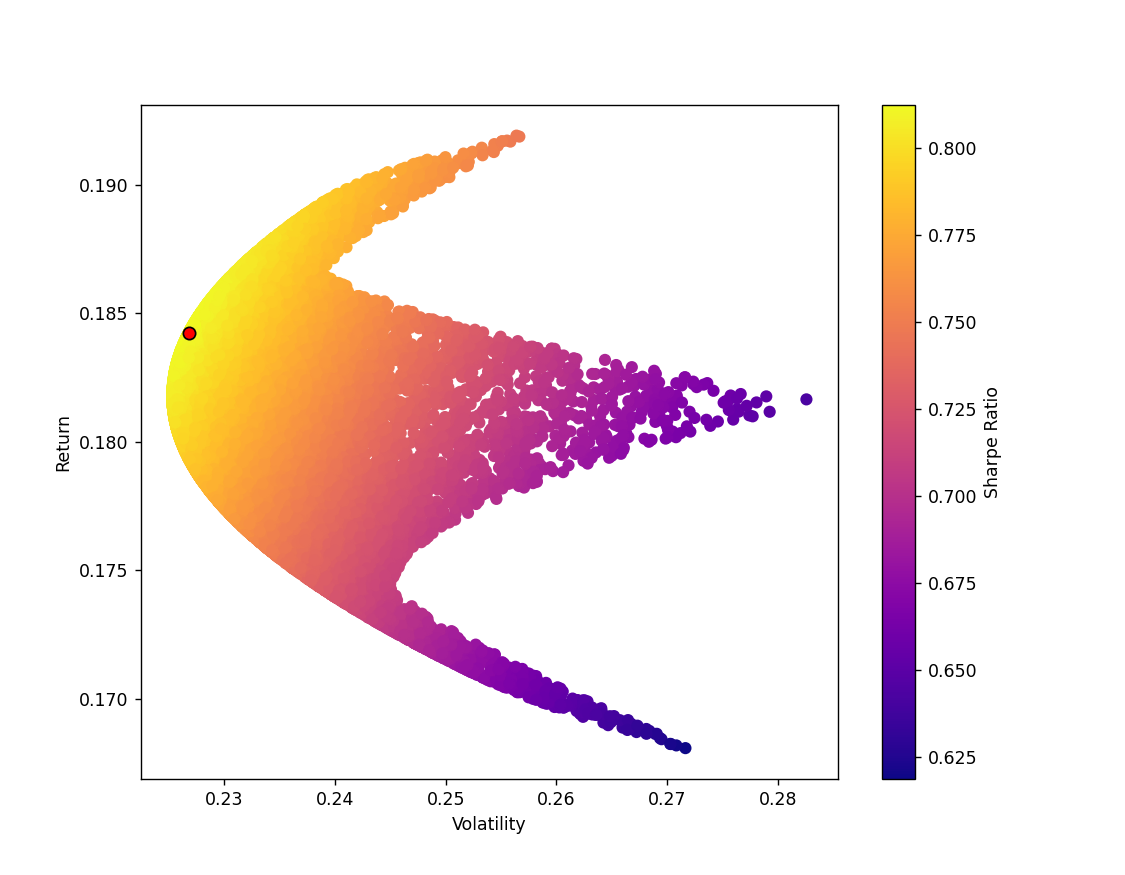

In [96]:
plt.figure(figsize=(9,7))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

pfig5 = plt.gcf()

# My weights portfolio

In [97]:
allocations = np.array(allocations)

# Expected Return
exp_ret = np.sum((log_ret.mean() * allocations) *252)

# Expected Variance
exp_vol = np.sqrt(np.dot(allocations.T, np.dot(log_ret.cov() * 252, weights)))
    
# Sharpe Ratio
sharpe_ratio = exp_ret/exp_vol


In [98]:
sharpe_ratio

0.807496137535445

# Sharpe Ratio based on Your allocation V/S Suggested Sharpe Ratio

<IPython.core.display.Javascript object>


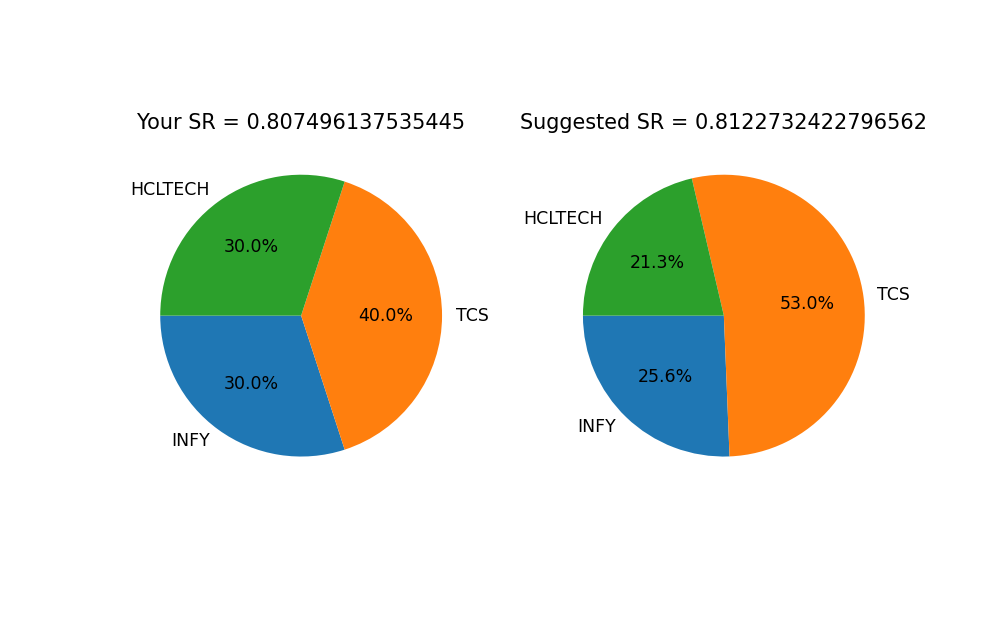

In [99]:
f = plt.figure(figsize =(8, 5))
plt.subplot(1,2,1)

plt.pie(allocations,labels=p_stocks,autopct='%1.1f%%',startangle=180);
plt.title("Your SR = "+str(sharpe_ratio));

plt.subplot(1,2,2)

plt.pie(all_weights[n,:],labels=p_stocks,autopct='%1.1f%%',startangle=180);
plt.title("Suggested SR = "+str(sharpe_arr.max()));

# Save portfolio analysis report

### To save run below cells

In [100]:
#import json
#import mpld3

In [101]:
json1 = mpld3.fig_to_dict(pfig1)
json2 = mpld3.fig_to_dict(pfig2)
json3 = mpld3.fig_to_dict(pfig3)
json4 = mpld3.fig_to_dict(pfig4)
json5 = mpld3.fig_to_html(pfig5)
json6 = mpld3.fig_to_dict(f)

In [102]:
myquery={ "_id": name }
newvalues = { "$set": {"pfig1":json1,"pfig2":json2,"pfig3":json3,"pfig4":json4,"hpfig5":json5,"pfig6":json6} }
coll.update_one(myquery, newvalues)

# http://localhost:3000/

# END

In [ ]:
#testing part

In [55]:
json1 = mpld3.fig_to_dict(pfig1)
json2 = mpld3.fig_to_dict(pfig2)
json3 = mpld3.fig_to_dict(pfig3)
json4 = mpld3.fig_to_dict(pfig4)
json5 = mpld3.fig_to_html(pfig5)

In [56]:
myquery={ "_id": name }
newvalues = { "$set": {"fig1":json1,"fig2":json2, "fig3":json3, "fig4":json4, "fig5":json5 } } 

coll.update_one(myquery, newvalues)

In [103]:
myclient.close()